#**Tweet Sentiment Analysis using RNN and LSTM**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer

In [ ]:
df=pd.read_excel('/content/TweetSentiment_60.xlsx')
df

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
101154,4,@jessikasay congrats on the followers
101155,4,@dannywood As in &quot;back dat ass on up in h...
101156,4,School In about 12 minutes then I get picked u...
101157,4,@itsMeeeech -- sounds fun!


#Text Pre-processing

In [ ]:
df["tweet"] = df["tweet"].astype(str)

###**Lower Casing**

In [ ]:
df["processed_tweets"] = df["tweet"].str.lower()
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [ ]:


print("\nOriginal Tweet:",df['tweet'][0])
print(df['processed_tweets'][0])



Original Tweet: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d


In [ ]:
len(df['processed_tweets'])

101159

###**Removal of @ and User names**

<!-- Tokenization -->

In [ ]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = tknzr.tokenize(df['processed_tweets'][a])
  res=" ".join(result)
  df['processed_tweets'][a]=res
print("\nTokenize a twitter text:")
print(df['processed_tweets'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



Tokenize a twitter text:
0         http://twitpic.com/2y1zl - awww , that's a bum...
1         is upset that he can't update his facebook by ...
2         i dived many times for the ball . managed to s...
3            my whole body feels itchy and like its on fire
4         no , it's not behaving at all . i'm mad . why ...
                                ...                        
101154                            congrats on the followers
101155    as in " back dat ass on up in here for some fu...
101156    school in about 12 minutes then i get picked u...
101157                                     - - sounds fun !
101158    good morning everyone welcome to my new follow...
Name: processed_tweets, Length: 101159, dtype: object


In [ ]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww , that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball . managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no , it's not behaving at all . i'm mad . why ..."


###**Remove Punctuations**

In [ ]:
# drop the new column created in last cell

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["processed_tweets"] = df["processed_tweets"].apply(lambda text: remove_punctuation(text))
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",httptwitpiccom2y1zl awww thats a bummer you...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove URLs**

In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)

In [ ]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(df['processed_tweets'])):

  result = remove_URL(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No URLs:")
print(result)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No URLs:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [ ]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


###**Remove Emojis**

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [ ]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoji(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


###**Removal of Emoticons¶**


In [ ]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

In [ ]:
for a in range(len(df['processed_tweets'])):

  result = remove_emoticons(df['processed_tweets'][a])
  df['processed_tweets'][a]=result
print("No Emoticons:")
print(result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No Emoticons:
good morning everyone welcome to my new followers and    big hug    to everyone  hope your monday morning is moving along spectacularly 


In [ ]:
df.head()

,target,tweet,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i ...


In [ ]:
df.isna().sum()

target              0
tweet               0
processed_tweets    0
dtype: int64

### **Labelling the target fileds**

In [ ]:
df['target'].value_counts()

4    51150
0    50009
Name: target, dtype: int64

0 --> negative, 

4 --> Positive

In [ ]:
df['Target']=df['target'].replace(4,1)
df['Target'].value_counts()

1    51150
0    50009
Name: Target, dtype: int64

0 --> negative, 

1 --> Positive

[Reference for maxlen](https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do)

In [ ]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

###**Stop words**

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


 #apply function   
df['processed_tweets'] = df['processed_tweets'].apply(lambda text: cleaning_stopwords(text))
df['processed_tweets'].head()

0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [ ]:
dataset = df.drop('tweet',axis=1)
dataset

,target,processed_tweets,Target
0,0,awww thats bummer shoulda got david carr third...,0
1,0,upset cant update facebook texting might cry r...,0
2,0,dived many times ball managed save 50 rest go ...,0
3,0,whole body feels itchy like fire,0
4,0,no not behaving im mad cant see over,0
...,...,...,...
101154,4,congrats followers,1
101155,4,back dat ass full service,1
101156,4,school 12 minutes get picked morgan,1
101157,4,sounds fun,1


###**Stemming**

In [ ]:
# import nltk
# st = nltk.PorterStemmer()
# def stemming_on_text(data):
#     text = [st.stem(word) for word in data]
#     return data
# df['processed_tweets']= df['processed_tweets'].apply(lambda x: stemming_on_text(x))
# df['processed_tweets'].head()

###**Lammentization**

In [ ]:
import nltk
nltk.download('wordnet')


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatizer_on_text(x))
df['processed_tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                 no not behaving im mad cant see over
Name: processed_tweets, dtype: object

In [ ]:
X = df['processed_tweets']
y = df['Target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(91043,)
(10116,)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(91043,)
(10116,)


In [ ]:
X_test

10538                                     ummmm wanna come
89283    lol aww celebrate earlier get loads complitmen...
40354             downloading 22nd episode heroes season 3
11834                                 going sleep im tired
585      cant set feet ground missing eyelid people mig...
                               ...                        
77266         oop hick ups oop nope awwwww wanted hick ups
51995    back 2 mile walk woobie doggie yet another stu...
22770              noooooo boo computer problems empathise
61798    hrm guess hit sack work 6 hours 9 hours later ...
36296                home justins farewell dinner dont die
Name: processed_tweets, Length: 10116, dtype: object

##**Text Sequencing**

In [ ]:

# tokenize and sequence sentences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[7013, 107, 68],
 [20, 306, 1612, 735, 6, 990, 52271, 307, 586, 852],
 [1732, 5523, 712, 2176, 517, 53],
 [12, 44, 1, 89],
 [15, 464, 848, 2090, 237, 15480, 75, 217, 6],
 [76, 98, 94, 263, 635, 9, 300, 10, 43, 5, 43, 757, 63, 16, 394, 1382, 53, 8],
 [33, 127, 23, 146, 251, 52272, 664, 94],
 [56, 102, 7, 8, 35, 23, 272, 300, 1305, 574, 193],
 [1007, 49, 12, 37, 70, 232, 4904, 181, 85, 309],
 [2865, 75, 141, 1550, 1615],
 [23, 132, 813, 1, 95, 1871, 816, 63, 6028, 658, 7508, 22747, 10096, 11, 4374],
 [362, 378, 34, 11, 141, 8, 5],
 [20, 13977, 503, 30, 1983, 9763],
 [68, 1643, 52273, 948, 79, 713],
 [105, 4, 3863, 21778, 19, 200, 1096, 2714, 179, 283, 72],
 [2555,
  225,
  8549,
  11,
  3233,
  2050,
  243,
  97,
  449,
  1,
  441,
  1442,
  3,
  13037,
  117,
  939],
 [10723, 2833, 48],
 [35, 226, 52274, 647, 213, 7, 2432, 323, 153, 98, 100, 647, 52275],
 [101, 1332, 245],
 [4, 266],
 [10, 186, 106],
 [984, 807, 639, 4, 124, 5013, 511, 578],
 [1172, 4742, 4422, 2724, 226, 2462, 915, 12

In [ ]:
# print('Maximum tweet length: {}'.format(
# len((max((train_text_vec + test_text_vec), key=len)))))

In [ ]:
#checking the next maximum number
lenght = []
for i in (train_text_vec + test_text_vec):
  if  10<len(i)<28:
    lenght.append(len(i))
max(lenght)

27

We can leave the maximum word length to 28

In [ ]:
## train['processed_tweets'].apply(lambda x : len(x.split(' '))).quantile(0.95)

In [ ]:
# pad the sequences

from keras.preprocessing import sequence
max_words = 28
X_train = sequence.pad_sequences(train_text_vec, maxlen=max_words)
X_test = sequence.pad_sequences(test_text_vec, maxlen=max_words)
# modelCNN = None
modelRNN=None
modelLSTM=None
print ("After Padding X[train[0]=\n", X_test[0])

After Padding X[train[0]=
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 7013  107   68]


<br>

**End of Data Preprocessing!!**



##**Modelling**

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 55475 unique tokens.


In [ ]:
len((train_text_vec + test_text_vec))*2

202318

In [ ]:

vocabulary_size = len((train_text_vec + test_text_vec))*2

#Glove Embeddings

In [ ]:
#Glove
embeddings_index = {}
f = open('/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 328025 word vectors.


In [ ]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word,i in tqdm(token.word_index.items()):
#     embedding_value = embedding_vector.get(word)
#     if embedding_value is not None:
#         embedding_matrix[i] = embedding_value

In [ ]:
#embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
# embedding_matrix.shape

#Recurrent Neural Network(RNN)

In [ ]:
#Now create a simple RNN model and lets see the accuracy
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [ ]:
embedding_size=100


modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 28, 100)           20231800  
                                                                 
 dropout_23 (Dropout)        (None, 28, 100)           0         
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 150)               37650     
                                                                 
 dropout_24 (Dropout)        (None, 150)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [ ]:
history = modelRNN.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")

Epoch 1/20
88/88 [==============================] - 5s 43ms/step - loss: 1.3429 - accuracy: 0.5364 - val_loss: 0.9103 - val_accuracy: 0.6133
Epoch 2/20
88/88 [==============================] - 4s 40ms/step - loss: 0.7964 - accuracy: 0.5923 - val_loss: 0.6662 - val_accuracy: 0.6719
Epoch 3/20
88/88 [==============================] - 4s 42ms/step - loss: 0.6580 - accuracy: 0.6481 - val_loss: 0.5956 - val_accuracy: 0.7275
Epoch 4/20
88/88 [==============================] - 4s 40ms/step - loss: 0.6048 - accuracy: 0.6858 - val_loss: 0.5437 - val_accuracy: 0.7510
Epoch 5/20
88/88 [==============================] - 4s 40ms/step - loss: 0.5724 - accuracy: 0.7126 - val_loss: 0.5213 - val_accuracy: 0.7588
Epoch 6/20
88/88 [==============================] - 4s 41ms/step - loss: 0.5474 - accuracy: 0.7313 - val_loss: 0.5087 - val_accuracy: 0.7695
Epoch 7/20
88/88 [==============================] - 4s 41ms/step - loss: 0.5307 - accuracy: 0.7425 - val_loss: 0.4962 - val_accuracy: 0.7695
Epoch 8/20
88

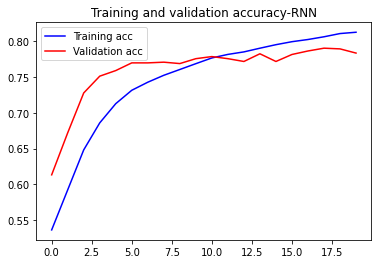

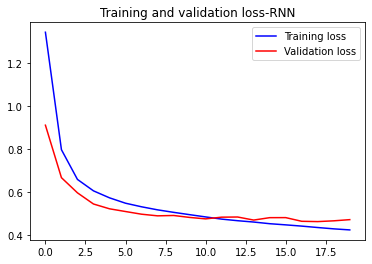

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

#Loading the last epoch modeln (Optional)

In [ ]:
#Loading the last epoch model
modelRNN=Sequential()
modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(SimpleRNN(150,activation = "tanh")) 
modelRNN.add(Dense(1, activation='sigmoid'))
print(modelRNN.summary())
modelRNN.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
modelRNN.load_weights("my_modRNN_Latest")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 28, 100)           20231800  
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dense_7 (Dense)             (None, 1)                 151       
                                                                 
Total params: 20,269,601
Trainable params: 20,269,601
Non-trainable params: 0
_________________________________________________________________
None


<br>

#LSTM

In [ ]:
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
embedding_size=100
modelLSTM=Sequential()
modelLSTM.add(Embedding(vocabulary_size,100,weights = [embedding_matrix],input_length=28)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelLSTM.add(Dropout(0.70))
modelLSTM.add(LSTM(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelLSTM.add(Dropout(0.15))
modelLSTM.add(Dense(1, activation='sigmoid'))
print(modelLSTM.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 28, 100)           20231800  
                                                                 
 dropout_25 (Dropout)        (None, 28, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               150600    
                                                                 
 dropout_26 (Dropout)        (None, 150)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 151       
                                                                 
Total params: 20,382,551
Trainable params: 20,382,551
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
modelLSTM.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 1024
num_epochs = 20
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listLSTM = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [ ]:
LSTMhistory = modelLSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listLSTM)
modelLSTM.save_weights("my_modLSTM_Latest")

Epoch 1/20
88/88 [==============================] - 7s 32ms/step - loss: 1.2052 - accuracy: 0.5737 - val_loss: 0.6885 - val_accuracy: 0.6689
Epoch 2/20
88/88 [==============================] - 2s 26ms/step - loss: 0.6486 - accuracy: 0.6480 - val_loss: 0.5803 - val_accuracy: 0.7236
Epoch 3/20
88/88 [==============================] - 2s 26ms/step - loss: 0.5901 - accuracy: 0.6955 - val_loss: 0.5402 - val_accuracy: 0.7500
Epoch 4/20
88/88 [==============================] - 2s 26ms/step - loss: 0.5556 - accuracy: 0.7246 - val_loss: 0.5117 - val_accuracy: 0.7539
Epoch 5/20
88/88 [==============================] - 2s 26ms/step - loss: 0.5331 - accuracy: 0.7378 - val_loss: 0.5007 - val_accuracy: 0.7666
Epoch 6/20
88/88 [==============================] - 2s 26ms/step - loss: 0.5151 - accuracy: 0.7515 - val_loss: 0.4853 - val_accuracy: 0.7715
Epoch 7/20
88/88 [==============================] - 2s 26ms/step - loss: 0.5013 - accuracy: 0.7599 - val_loss: 0.4785 - val_accuracy: 0.7773
Epoch 8/20
88

##**Performance Measure**

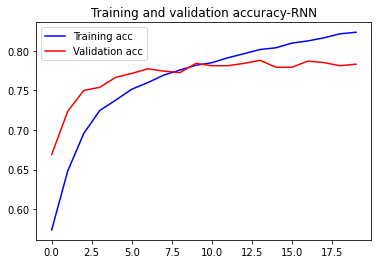

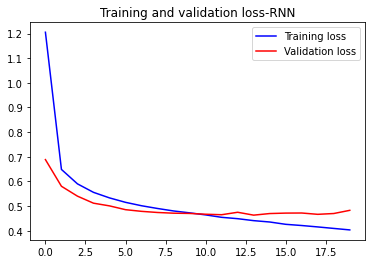

In [ ]:
import matplotlib.pyplot as plt
acc = modelLSTM.history.history['accuracy']
val_acc = modelLSTM.history.history['val_accuracy']
loss = modelLSTM.history.history['loss']
val_loss = modelLSTM.history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-LSTM')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-LSTM')
plt.legend()
 
plt.show()

###**Confusion matrix and classification_report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cf_matrix=confusion_matrix(y_test, y_predict.round())

In [ ]:
y_predict = modelRNN.predict(X_test)
print(classification_report(y_test, y_predict.round()))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      4986
           1       0.61      0.61      0.61      5130

    accuracy                           0.60     10116
   macro avg       0.60      0.60      0.60     10116
weighted avg       0.60      0.60      0.60     10116



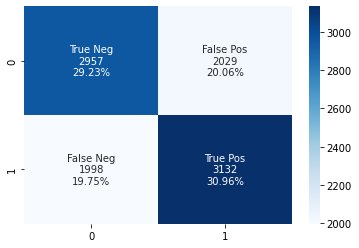

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

##**Custom Tweet For Extra Test**

In [ ]:
test_data=['today is a sad day','he was happy today','not a good job']

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=28)
x_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
         61,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          4, 275]], dtype=int32)

In [ ]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  if res[i]>0.3:
    print('Sentiment type:Positive',res[i])
  else:
    print('Sentiment type:Negative',res[i])
  print('==================================================\n')

Test sentence:- today is a sad day
Sentiment type:Negative [0.00014713]

Test sentence:- he was happy today
Sentiment type:Positive [0.514753]

Test sentence:- not a good job
Sentiment type:Positive [0.4550988]



###**Building a function to convert words into vector**

In [ ]:
#pre- processing custom tweets ()
def preprocess_tweets(tweet):
    #fo = open('/content/stopwords.txt', "r+")
    #stop_words = list(fo.read().split(','))
    #translation={39:None}
    processed_tweet = tweet
    processed_tweet=re.sub('\d+', '',tweet)
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",processed_tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(STOPWORDS))
    
    return(processed_tweet)

In [ ]:
def tweet_to_vector(text):
  print('Original tweet:-',text)
  text=preprocess_tweets(text)
  print('Processed tweet:- '+text)
  text=text.split(' ')
  tokenizer = Tokenizer(lower=False)
  tokenizer.fit_on_texts(text)
  text_vec = tokenizer.texts_to_sequences(text)
  word_index = tokenizer.word_index
  print(word_index)
  print('==================================================')
  embeddings_index = {}
  f = open('/content/glove.6B.100d.txt')
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    if word in word_index.keys():  
      embeddings_index[word] = coefs
  for notw in word_index.keys():
    if notw not in embeddings_index.keys():
      embeddings_index[notw] = 'unknown'
  f.close()
  print('Vector for each word in processed tweet')
  print(embeddings_index)

In [ ]:
custom_tweet='@meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest'
custom_tweets= tweet_to_vector(custom_tweet)

Original tweet:- @meera2353 Hello this is very bad that company fired them, not a good day #job #sad #employeeprotest
Processed tweet:- Hello bad company fired not good day job sad employeeprotest
{'Hello': 1, 'bad': 2, 'company': 3, 'fired': 4, 'not': 5, 'good': 6, 'day': 7, 'job': 8, 'sad': 9, 'employeeprotest': 10}
Vector for each word in processed tweet
{'not': array([-1.9104e-01,  1.7601e-01,  3.6920e-01, -5.0323e-01, -4.7561e-01,
        1.5798e-01, -1.1679e-01,  2.1052e-01,  3.2652e-01,  1.2194e-01,
        9.0944e-02,  2.6089e-01,  7.6294e-01,  6.9673e-04, -5.0001e-02,
       -4.4853e-01,  3.6239e-01,  5.6345e-01, -6.8702e-01,  3.3237e-01,
        3.1285e-01, -1.4207e-01,  3.5327e-01, -1.6426e-01, -1.0693e-01,
        7.7786e-02, -1.7704e-01, -9.2897e-01,  1.4680e-01, -1.3585e-01,
        2.5682e-01,  6.6019e-01, -3.5569e-01,  2.1838e-01,  3.8173e-01,
        5.4337e-01,  1.0197e-01,  3.5230e-01, -2.5510e-01, -1.5155e-01,
       -6.7434e-01,  1.6903e-01,  1.6413e-01, -5.3843e-0

In [ ]:
# cont_y_test = []
# for i in y_test:
#   i = float(i)
#   cont_y_test.append(i) 

